In [1]:
!pip install keras
!pip install tensorflow
!pip install scikeras

In [2]:
import keras
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [4]:
gas=pd.read_csv('gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
tf.random.set_seed(14) 

In [6]:
df=gas[['AT','AP','AH','TEY']]
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [7]:
df.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [11]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [12]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [13]:
scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)
scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)
scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)
scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [14]:
len(xtrain_scale)

10527

In [15]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [16]:
scores = fit.scores_
features = fit.transform(X)

In [17]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,0.412518,AT
1,0.138040,AP
2,0.097945,AH


In [18]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
0,0.412518,AT
1,0.138040,AP
2,0.097945,AH


In [19]:
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


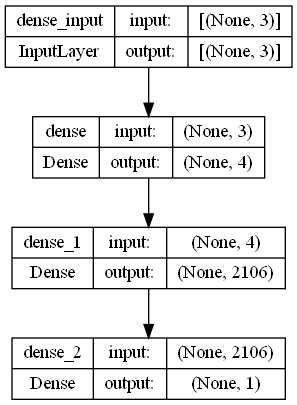

In [20]:
plot_model(model,show_shapes=True)

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [22]:
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100


48/48 [==============================] - 2s 9ms/step - loss: 0.0683 - mse: 0.0683 - mae: 0.2012 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1653
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0451 - mse: 0.0451 - mae: 0.1568 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1610
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0439 - mse: 0.0439 - mae: 0.1590 - val_loss: 0.0425 - val_mse: 0.0425 - val_mae: 0.1550
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0427 - mse: 0.0427 - mae: 0.1577 - val_loss: 0.0418 - val_mse: 0.0418 - val_mae: 0.1568
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0421 - mse: 0.0421 - mae: 0.1587 - val_loss: 0.0425 - val_mse: 0.0425 - val_mae: 0.1622
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0419 - mse: 0.0419 - mae: 0.1601 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1602
Epoch 7/100
48/48 [=

In [23]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


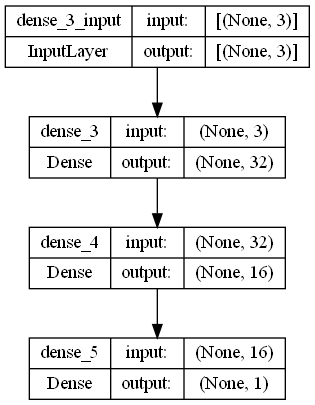

In [24]:
plot_model(model1,show_shapes=True)

In [25]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [26]:
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 2s 3ms/step - loss: 316.3046 - mae: 13.4641 - val_loss: 247.1774 - val_mae: 11.9458
Epoch 2/50
658/658 [==============================] - 2s 2ms/step - loss: 255.9063 - mae: 12.5000 - val_loss: 239.1284 - val_mae: 12.0912
Epoch 3/50
658/658 [==============================] - 2s 2ms/step - loss: 245.0508 - mae: 12.3622 - val_loss: 251.9730 - val_mae: 12.7591
Epoch 4/50
658/658 [==============================] - 2s 2ms/step - loss: 238.0752 - mae: 12.2827 - val_loss: 251.0470 - val_mae: 12.7462
Epoch 5/50
658/658 [==============================] - 2s 2ms/step - loss: 241.6048 - mae: 12.4108 - val_loss: 229.9065 - val_mae: 12.0535
Epoch 6/50
658/658 [==============================] - 2s 2ms/step - loss: 235.1088 - mae: 12.2142 - val_loss: 227.2151 - val_mae: 11.9689
Epoch 7/50
658/658 [==============================] - 2s 3ms/step - loss: 245.1105 - mae: 12.5401 - val_loss: 234.3865 - val_mae: 12.2317
Epoch 8/50
658/658 [==============

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


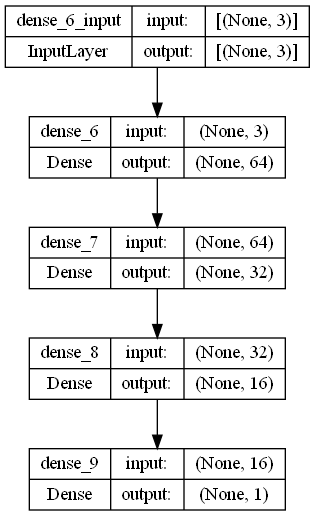

In [28]:
plot_model(model2,show_shapes=True)

In [29]:
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

In [30]:
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 [==============================] - 2s 3ms/step - loss: 13.8413 - mse: 477.8228 - val_loss: 11.3531 - val_mse: 244.4202
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 11.3634 - mse: 243.0153 - val_loss: 11.4219 - val_mse: 245.0324
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 11.4191 - mse: 243.3263 - val_loss: 11.4177 - val_mse: 244.1866
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 11.4035 - mse: 242.0871 - val_loss: 11.4908 - val_mse: 242.9938
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 11.3940 - mse: 241.7348 - val_loss: 11.2757 - val_mse: 241.5461
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 11.4171 - mse: 241.7340 - val_loss: 11.4875 - val_mse: 243.7116
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 11.4262 - mse: 242.4851 - val_loss: 11.3386 - val_mse: 241.1832
Epoch 8/100
329/329 [======

In [31]:
y_pred=model.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [32]:
y_pred1=model1.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [33]:
y_pred2=model2.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [34]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [35]:
mse=mean_squared_error(ytest_scale,y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.040621663723248956


In [36]:
mse=mean_squared_error(ytest_scale,y_pred1)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.12454413171596228


In [37]:
mse=mean_squared_error(ytest_scale,y_pred2)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.08240883763211213


In [38]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038686,0.038686,0.155425,0.038172,0.038172,0.154615,95
96,0.038054,0.038054,0.153671,0.038155,0.038155,0.153608,96
97,0.038178,0.038178,0.153095,0.038507,0.038507,0.156280,97
98,0.038115,0.038115,0.153354,0.038712,0.038712,0.155704,98
99,0.038029,0.038029,0.152901,0.038777,0.038777,0.156189,99


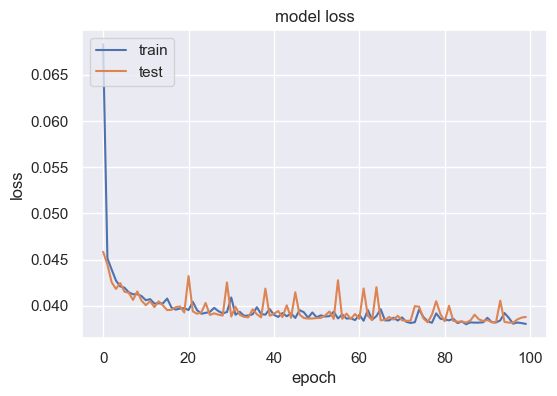

In [39]:
sns.set(rc={'figure.figsize':(6,4)})
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

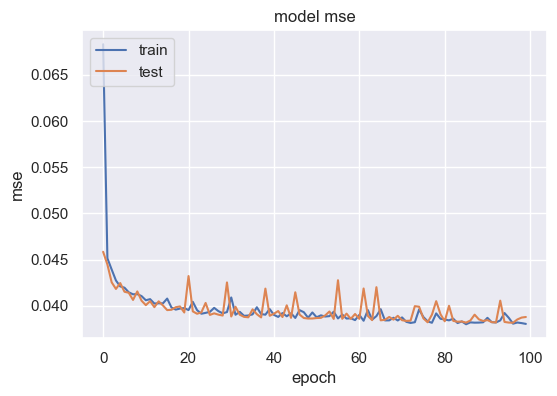

In [40]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


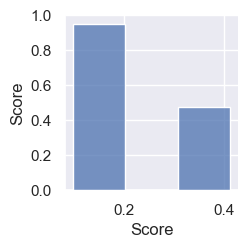

In [41]:
sns.pairplot(data=score_df)

<Axes: >

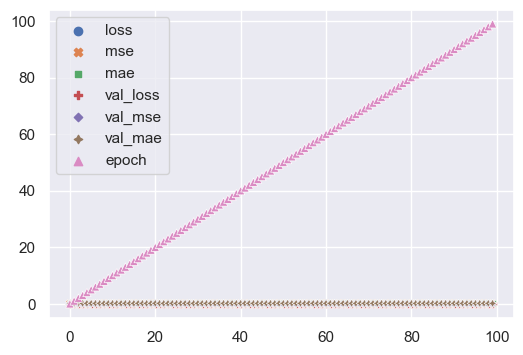

In [45]:
sns.scatterplot(data=hist_df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


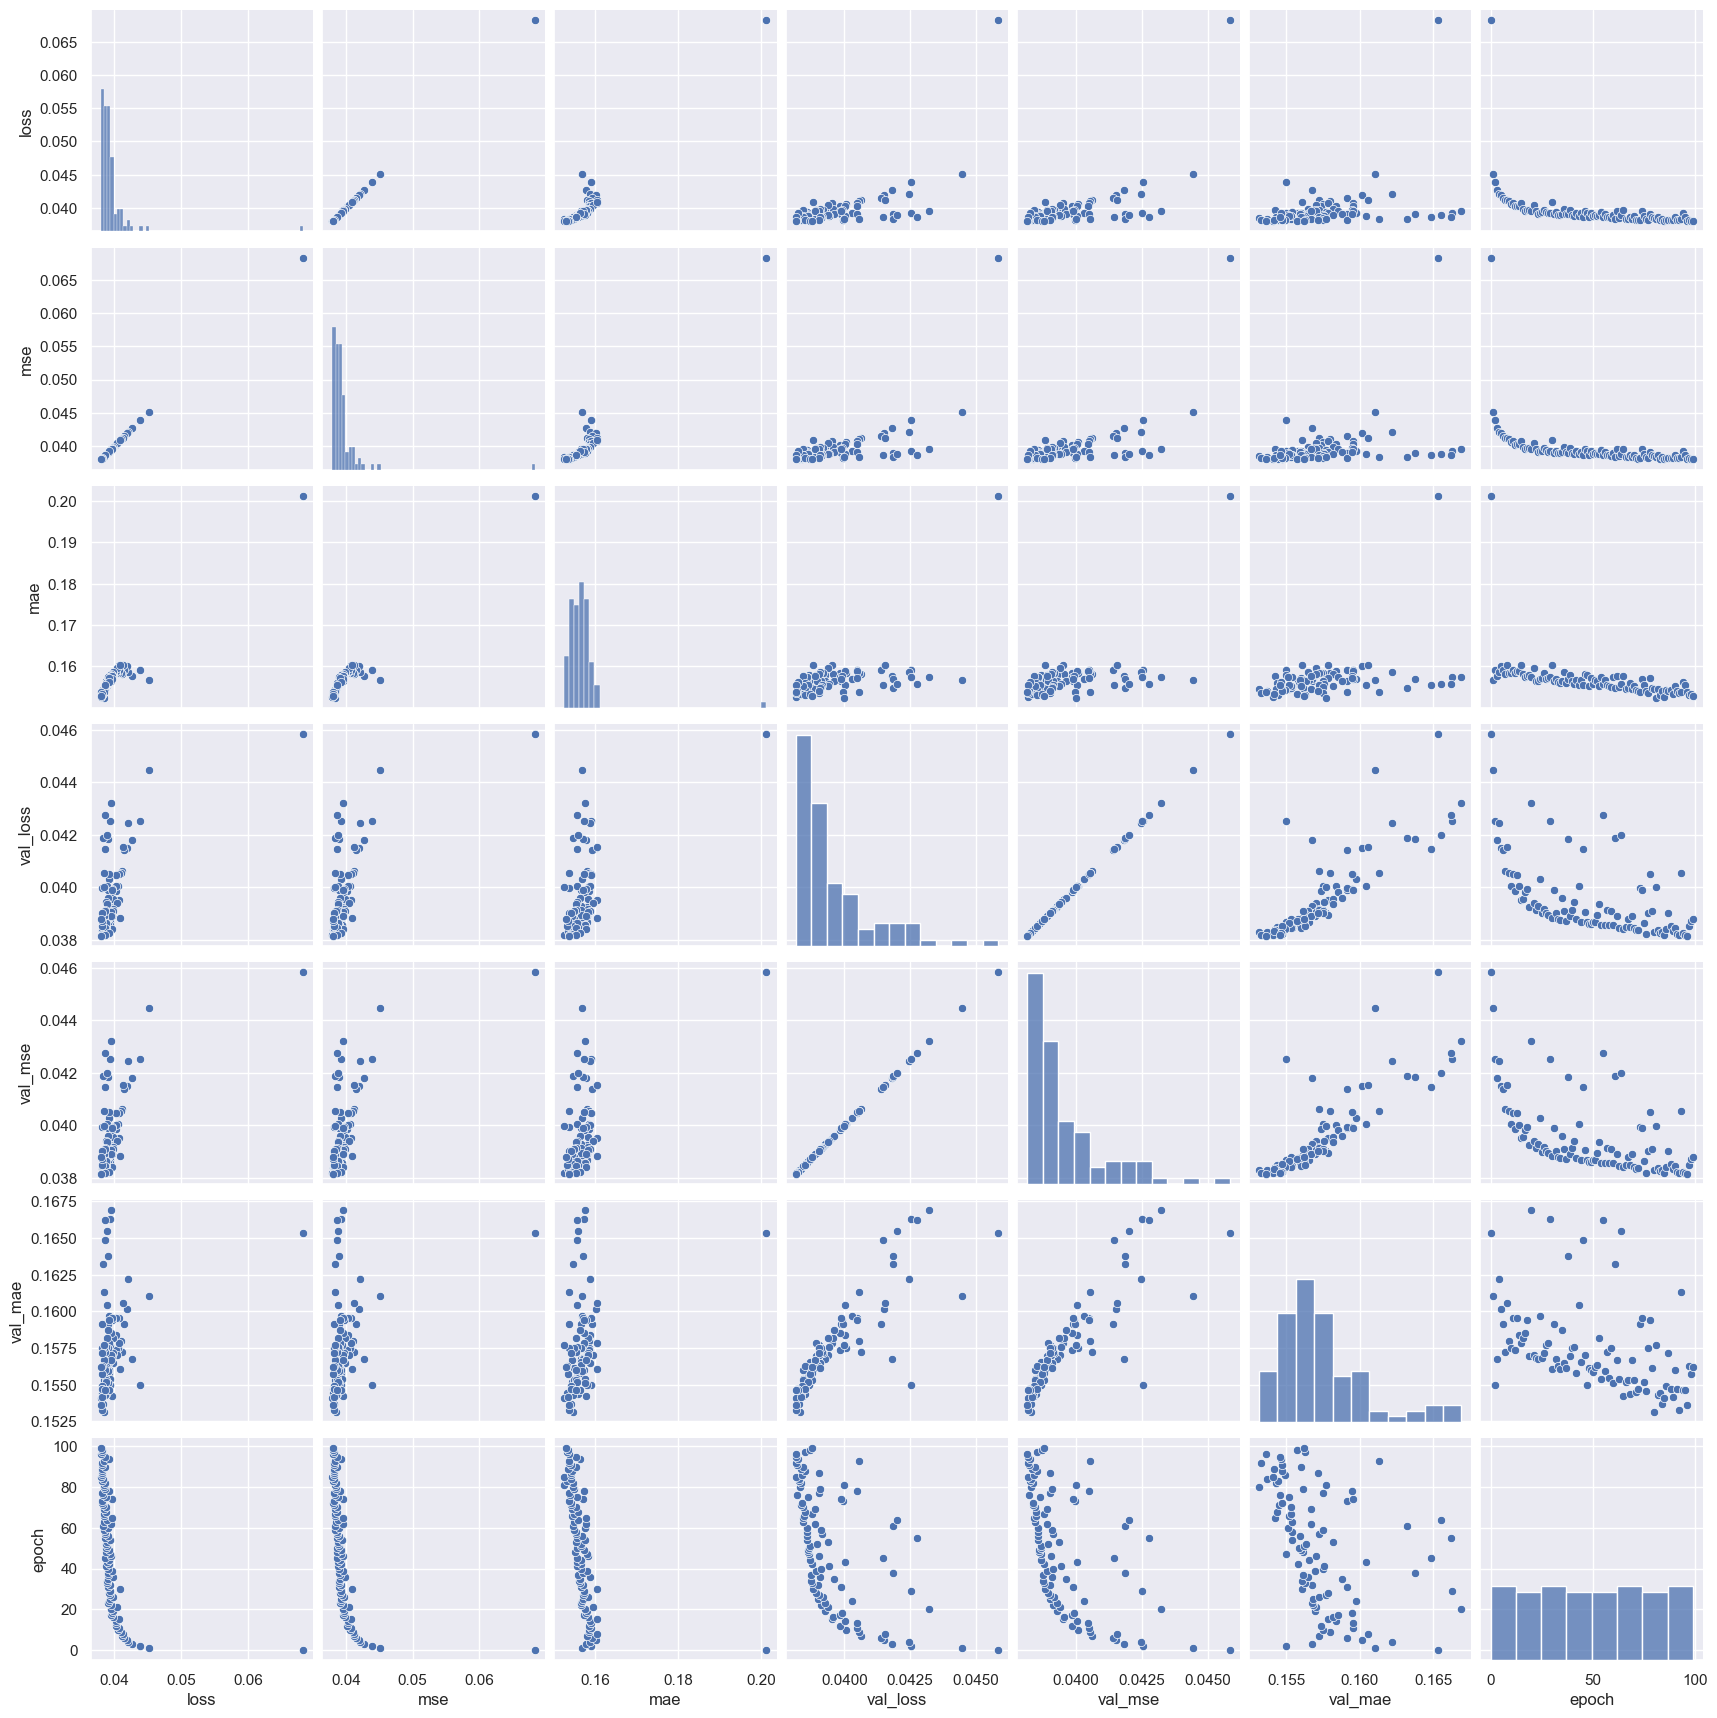

In [46]:
sns.pairplot(data=hist_df)